In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()

# Move uploaded files into your personal folder
for filename in uploaded.keys():
    os.rename(filename, os.path.join(Moumita,Image_captioning ))

In [2]:
!git clone https://github.com/razorx89/roco-dataset.git

Cloning into 'roco-dataset'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 114 (delta 7), reused 20 (delta 7), pack-reused 91 (from 1)
Receiving objects: 100% (114/114), 13.01 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (31/31), done.


# Importing different library

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import textwrap
import cv2

In [ ]:
!python3 /content/roco-dataset/scripts/fetch.py

Streaming output truncated to the last 5000 lines.
89.300% | 41612/46598 | PMC3984769
89.302% | 41613/46598 | PMC4072392
89.304% | 41614/46598 | PMC3269654
89.306% | 41615/46598 | PMC4621276
89.309% | 41616/46598 | PMC4619577
89.311% | 41617/46598 | PMC1978243
89.313% | 41618/46598 | PMC4432449
89.315% | 41619/46598 | PMC4675004
89.317% | 41620/46598 | PMC3953627
89.319% | 41621/46598 | PMC4460548
89.321% | 41622/46598 | PMC5502573
89.324% | 41623/46598 | PMC4435852
89.326% | 41624/46598 | PMC3290114
89.328% | 41625/46598 | PMC2740835
89.330% | 41626/46598 | PMC2253542
89.332% | 41627/46598 | PMC4055357
89.334% | 41628/46598 | PMC4564506
89.336% | 41629/46598 | PMC3954297
89.339% | 41630/46598 | PMC3015802
89.341% | 41631/46598 | PMC1368977
89.343% | 41632/46598 | PMC4143510
89.345% | 41633/46598 | PMC3627160
89.347% | 41634/46598 | PMC2841377
89.349% | 41635/46598 | PMC4152832
89.351% | 41636/46598 | PMC2629172
89.354% | 41637/46598 | PMC5133587
89.356% | 41638/46598 | PMC3340973
89.3

In [ ]:
import shutil

# Specify the source path in Colab and the destination in Google Drive
source_path = '/content/roco-dataset'
destination_path = '/content/drive/MyDrive/ROCO_dataset/'

# Move the file or folder
shutil.move(source_path, destination_path)


'/content/drive/MyDrive/ROCO_dataset/'

In [ ]:
!zip -r roco.zip /content/drive/MyDrive/ROCO_dataset/

Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_81067.jpg (deflated 32%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_67681.jpg (deflated 21%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_70866.jpg (deflated 5%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_44718.jpg (deflated 1%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_33577.jpg (deflated 0%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_21846.jpg (deflated 2%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_39641.jpg (deflated 0%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_16055.jpg (deflated 4%)
  adding: content/drive/MyDrive/ROCO_dataset/data/train/radiology/images/ROCO_79431.jpg (deflated 1%)
  adding: content/drive/MyDri

# Load the caption.txt file from non-radiology folder of test folder

In [4]:
df = pd.read_table('/content/drive/MyDrive/ROCO_dataset/data/test/non-radiology/captions.txt',header=None,names = ['image_id','caption'])

In [5]:
df

,image_id,caption
0,ROCO_81827,Scanning electron microscopy of demineralized...
1,ROCO_81835,"Schistosomiasis of the liver, showing the pec..."
2,ROCO_81851,Preoperative right fundus and OCT imaging in ...
3,ROCO_81853,Incubation of skin allografts in 85% glycerol...
4,ROCO_81857,“Hans Christian Jacobaeus (1879–1937)” Figure...
...,...,...
607,ROCO_87910,Laryngoscopy Post-treatment.
608,ROCO_87912,Colony and microscopic characteristics of Cam...
609,ROCO_87919,Clinical photograph of CHED demonstrating blu...
610,ROCO_87932,Schematic representation of a brain network m...


Describe the caption column

In [6]:
df['caption'].describe()

,caption
count,612
unique,612
top,Scanning electron microscopy of demineralized...
freq,1


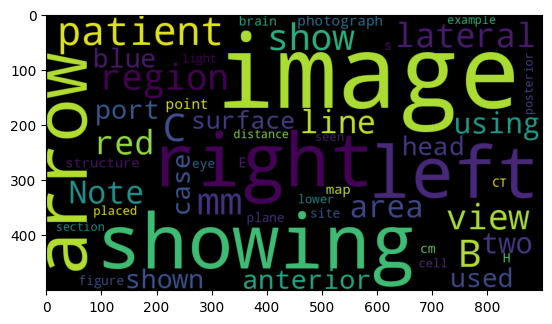

In [7]:
from wordcloud import WordCloud
caption_text=' '.join(df['caption'].astype(str))
wordcloud=WordCloud(width=900,height=500,max_words=50).generate(caption_text)
plt.imshow(wordcloud)

# Load the dlinks.txt file from non-radiology folder of test folder

In [8]:
dlink_url='/content/drive/MyDrive/ROCO_dataset/data/test/non-radiology/dlinks.txt'
dlink = pd.read_table(dlink_url,header = None,names=['image_id','dlink','image'])
dlink

,image_id,dlink,image
0,ROCO_81827,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,1678-7757-jaos-14-02-0117-gf05.jpg
1,ROCO_81835,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,0036-4665-rimtsp-56-01-00092-gf01.jpg
2,ROCO_81851,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,opth-9-169Fig1.jpg
3,ROCO_81853,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,10561_2011_9244_Fig1_HTML.jpg
4,ROCO_81857,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,jsls-1-1-83-g02.jpg
...,...,...,...
607,ROCO_87910,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,10-7162-s-1809-97772012000400015-i160415-2.jpg
608,ROCO_87912,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,alm-35-657-g001.jpg
609,ROCO_87919,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,BMRI2015-475392.002.jpg
610,ROCO_87932,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,1471-2202-14-S1-P193-1.jpg


Describe the dlink column

In [9]:
dlink['dlink'].describe()

,dlink
count,612
unique,601
top,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...
freq,2


Store some image in a list

In [10]:
img ="/content/drive/MyDrive/ROCO_dataset/data/test/non-radiology/images"#image url
list1 = []
if os.path.exists(img):
    for file in os.listdir(img):
        list1.append(file)
else:
    print(f"The path {img} does not exist.")
len(list1)

610

Captioning some image

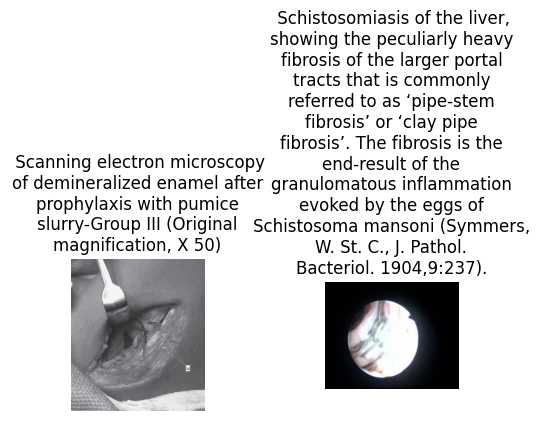

In [12]:
file_names1 = os.listdir(img)
wrap_width = 30

fig, axs = plt.subplots(1,2, figsize=(5, 6))

plt.subplots_adjust(wspace = 0.9,hspace=0.9)
axs = axs.flatten()
for i in range(2):
    file_path = os.path.join(img, list1[i])
    image = Image.open(file_path)
    caption = df["caption"][i]
    wrapped_caption = "\n".join(textwrap.wrap(caption, wrap_width))
    axs[i].imshow(image)
    axs[i].set_title(wrapped_caption)
    axs[i].axis('off')

plt.show()


creation of dataframe

In [13]:
# Define the root data directory
data_dir = '/content/drive/MyDrive/ROCO_dataset/data'

# Initialize an empty list to store the data
data = []

# Iterate through each split (train, test, validation)
for split in ['train', 'test', 'validation']:
    split_dir = os.path.join(data_dir, split)

    # Iterate through each category (radiology, non-radiology)
    for category in ['radiology', 'non-radiology']:
        category_dir = os.path.join(split_dir, category)
        captions_file = os.path.join(category_dir, 'captions.txt')

        # Read captions.txt if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r') as file:
                # Read each line in the file as a caption
                for line in (file):
                    caption = line[12:].strip()
                    id = line[:12]
                    label = 'radiology' if category == 'radiology' else 'non-radiology'
                    # Append the caption, label, and split type to the data list
                    data.append([id,caption, label, split])

# Create a DataFrame with the collected data
data = pd.DataFrame(data, columns=['image_id','Caption', 'Label', 'Split'])

data


,image_id,Caption,Label,Split
0,ROCO_00002\t,Computed tomography scan in axial view showing...,radiology,train
1,ROCO_00003\t,Bacterial contamination occurred after complet...,radiology,train
2,ROCO_00004\t,The patient had residual paralysis of the hand...,radiology,train
3,ROCO_00005\t,Panoramic radiograph after immediate loading.,radiology,train
4,ROCO_00007\t,Plain abdomen x-ray: Multiple air levels at th...,radiology,train
...,...,...,...,...
87922,ROCO_87894\t,Scanning electron photomicrograph of blood cel...,non-radiology,validation
87923,ROCO_87904\t,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation
87924,ROCO_87918\t,Under visualization through the anterolateral ...,non-radiology,validation
87925,ROCO_87936\t,The endoscopic view demonstrated progressive d...,non-radiology,validation


Describe each column of dataframe

In [14]:
data.describe()

,image_id,Caption,Label,Split
count,87927,87927,87927,87927
unique,87927,86778,2,3
top,ROCO_00002\t,Preoperative radiograph,radiology,train
freq,1,25,81809,70345


Describe caption column of dataframe

In [15]:
data['Caption'].describe()

,Caption
count,87927
unique,86778
top,Preoperative radiograph
freq,25


In [16]:
from wordcloud import WordCloud

In [17]:
caption_text=' '.join(data['Caption'].astype(str))

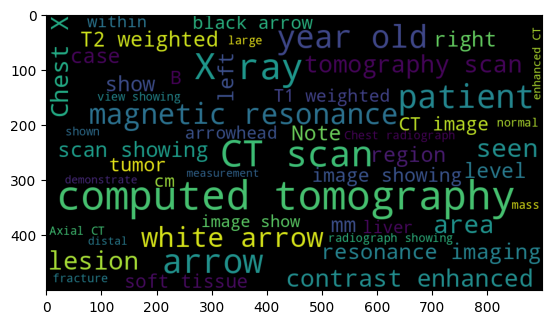

In [18]:
wordcloud=WordCloud(width=900,height=500,max_words=50).generate(caption_text)
plt.imshow(wordcloud)

Describe split column of dataframe

In [19]:
data['Split'].describe()

,Split
count,87927
unique,3
top,train
freq,70345


Pie chart of split column for showing distribution of train,test and validation

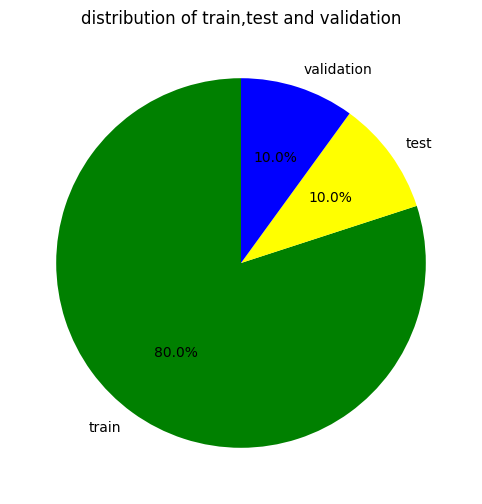

In [20]:
split_counts = data['Split'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%',startangle=90,colors=['green','yellow','blue'])
plt.title('distribution of train,test and validation')
plt.show()

Describe Label column

In [21]:
data['Label'].describe()

,Label
count,87927
unique,2
top,radiology
freq,81809


Pie chart for showing distribution of radiology and non-radiology

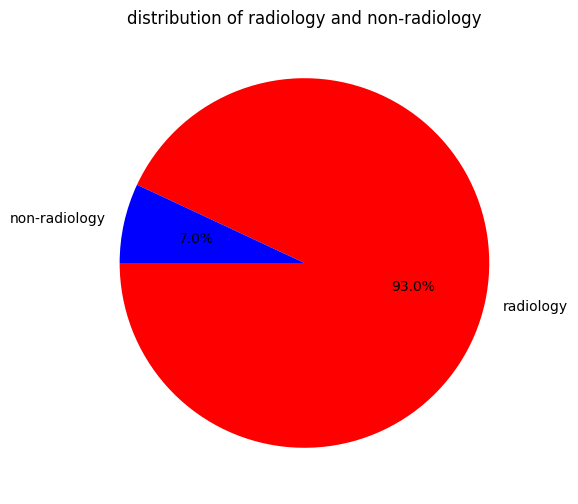

In [22]:
label_counts = data['Label'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',startangle=180,colors=['red','blue'])
plt.title('distribution of radiology and non-radiology')
plt.show()

## **Image Preprocessing** **technique**

In [23]:
img_dir = "/content/drive/MyDrive/ROCO_dataset/data/test/radiology/images"

In [24]:
image_files=[f for f in os.listdir(img_dir) if f.endswith(".jpg")]

In [25]:
image_files

['ROCO_70136.jpg',
 'ROCO_70088.jpg',
 'ROCO_70141.jpg',
 'ROCO_70242.jpg',
 'ROCO_70236.jpg',
 'ROCO_70158.jpg',
 'ROCO_70192.jpg',
 'ROCO_70256.jpg',
 'ROCO_70244.jpg',
 'ROCO_70276.jpg',
 'ROCO_70266.jpg',
 'ROCO_70286.jpg',
 'ROCO_70278.jpg',
 'ROCO_70297.jpg',
 'ROCO_70288.jpg',
 'ROCO_70347.jpg',
 'ROCO_70296.jpg',
 'ROCO_70317.jpg',
 'ROCO_70381.jpg',
 'ROCO_70349.jpg',
 'ROCO_70370.jpg',
 'ROCO_70355.jpg',
 'ROCO_70398.jpg',
 'ROCO_70393.jpg',
 'ROCO_70412.jpg',
 'ROCO_70445.jpg',
 'ROCO_70436.jpg',
 'ROCO_70434.jpg',
 'ROCO_70423.jpg',
 'ROCO_70458.jpg',
 'ROCO_70473.jpg',
 'ROCO_70488.jpg',
 'ROCO_70478.jpg',
 'ROCO_70527.jpg',
 'ROCO_70521.jpg',
 'ROCO_70560.jpg',
 'ROCO_70565.jpg',
 'ROCO_70536.jpg',
 'ROCO_70593.jpg',
 'ROCO_70622.jpg',
 'ROCO_70610.jpg',
 'ROCO_70602.jpg',
 'ROCO_70618.jpg',
 'ROCO_70651.jpg',
 'ROCO_70629.jpg',
 'ROCO_70643.jpg',
 'ROCO_70733.jpg',
 'ROCO_70663.jpg',
 'ROCO_70665.jpg',
 'ROCO_70741.jpg',
 'ROCO_70771.jpg',
 'ROCO_70787.jpg',
 'ROCO_70837

In [26]:
img_path=os.path.join(img_dir,image_files[90])

In [27]:
print(img_path)

/content/drive/MyDrive/ROCO_dataset/data/test/radiology/images/ROCO_71251.jpg


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 76,  76,  76],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [112, 112, 112],
        [ 97,  97,  97],
        [ 73,  73,  73]],

       [[ 73,  73,  73],
        [115, 115, 115],
        [121, 121, 121],
        ...,
        [107, 107, 107],
        [ 90,  90,  90],
        [ 64,  64,  64]],

       [[ 72,  72,  72],
        [111, 111, 111],
        [119, 119, 119],
        ...,
        [104, 104, 104],
        [ 87,  87,  87],
        [ 64,  64,  64]]], dtype=uint8)
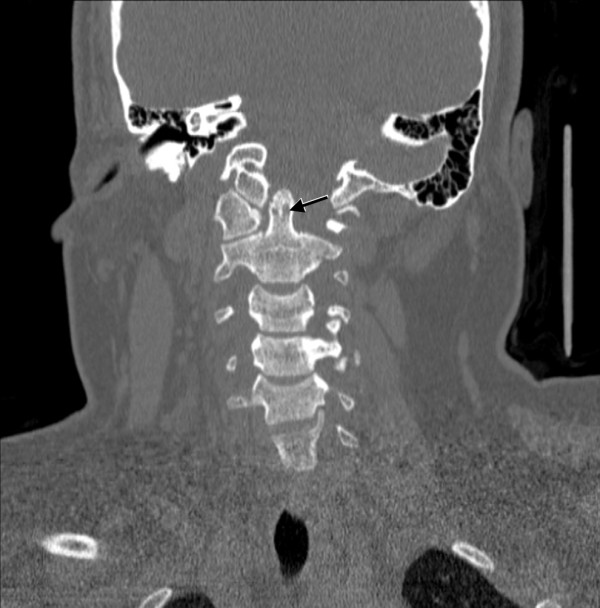

In [28]:
img=cv2.imread(img_path)
img

In [29]:
img.shape

(608, 600, 3)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[103, 103, 103],
        [113, 113, 113],
        [103, 103, 103],
        ...,
        [ 66,  66,  66],
        [ 99,  99,  99],
        [ 89,  89,  89]],

       [[118, 118, 118],
        [110, 110, 110],
        [ 93,  93,  93],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 96,  96,  96]],

       [[106, 106, 106],
        [123, 123, 123],
        [113, 113, 113],
        ...,
        [116, 116, 116],
        [ 85,  85,  85],
        [ 84,  84,  84]]], dtype=uint8)
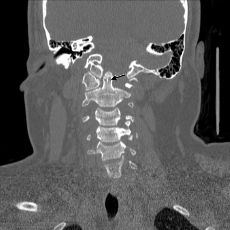

In [ ]:
target_size=(230,230)
cv2.resize(img,target_size)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 76, 122, 123, ..., 112,  97,  73],
       [ 73, 115, 121, ..., 107,  90,  64],
       [ 72, 111, 119, ..., 104,  87,  64]], dtype=uint8)
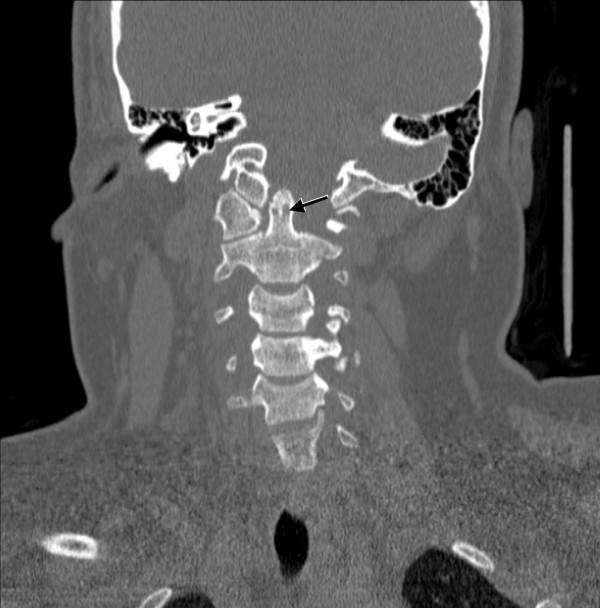

In [ ]:
img_processed=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_processed

In [ ]:
img_normalised=img/255
img_normalised

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.29803922, 0.29803922, 0.29803922],
        [0.47843137, 0.47843137, 0.47843137],
        [0.48235294, 0

In [ ]:
# Optional: Apply histogram equalization and denoising
img_eq = cv2.equalizeHist(img_processed.squeeze())
print(f"Equalized Image (first 5 pixels): {img_eq[:5, :5]}")

img_denoised = cv2.GaussianBlur(img_eq, (5, 5), 0)
print(f"Denoised Image (first 5 pixels): {img_denoised[:5, :5]}")

Equalized Image (first 5 pixels): [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Denoised Image (first 5 pixels): [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


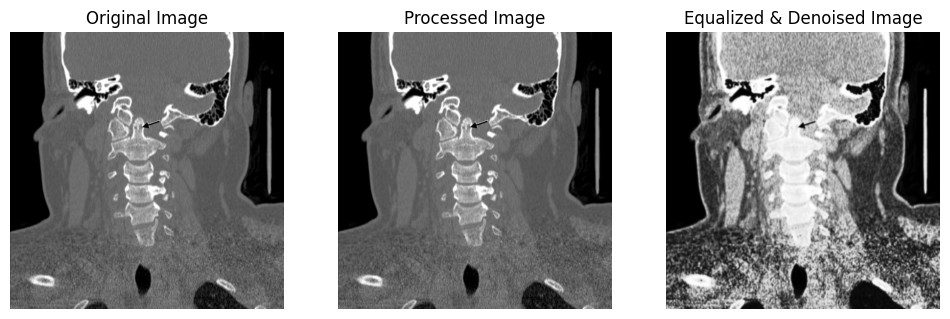

In [ ]:
# Visualize the original, preprocessed, and denoised images

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
img_original = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed Image (Grayscale & Normalized)
plt.subplot(1, 3, 2)
plt.imshow(img_processed.squeeze(), cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Equalized and Denoised Image (Optional)
plt.subplot(1, 3, 3)
plt.imshow(img_denoised, cmap='gray')
plt.title('Equalized & Denoised Image')
plt.axis('off')

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
img=np.expand_dims(img,axis=0)


In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2
    #zoom_range=0.2,
    horizontal_flip=0.2
                                        )
it=datagen.flow(img,batch_size=1)
augmented_images=[next(it)[0] for _ in range(5)]

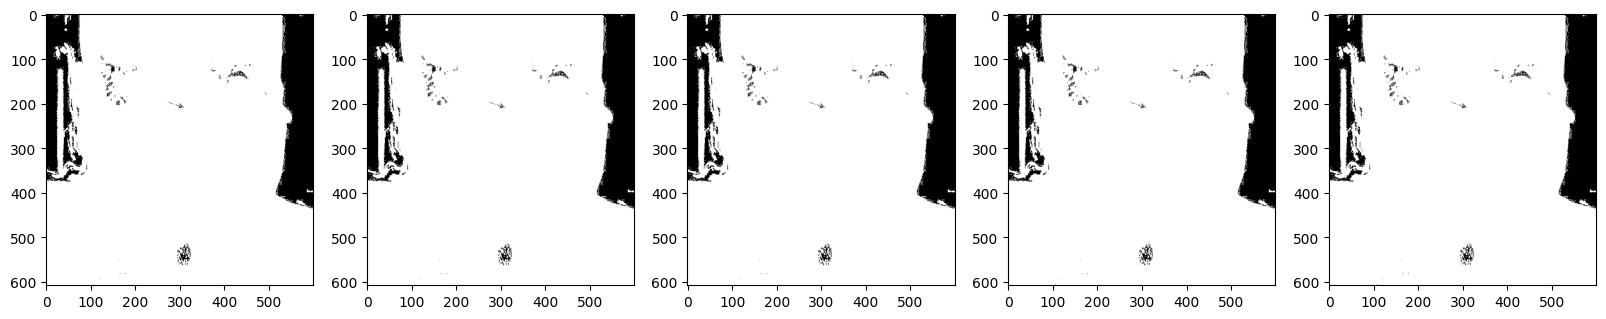

In [ ]:
plt.figure(figsize=(20,5))
for i,aug_img in enumerate(augmented_images):
  plt.subplot(1,5,i+1)
  plt.imshow(aug_img)

NLP Preprocessing Techniques

In [32]:
corpus = "A corpus can be defined as a collection of text documents. It can be thought as just a bunch of text files in a directory, often alongside many other directories of text files."

In [33]:
corpus = corpus.lower()

In [34]:
print(corpus)

a corpus can be defined as a collection of text documents. it can be thought as just a bunch of text files in a directory, often alongside many other directories of text files.


stop words

In [35]:
from nltk.corpus import stopwords

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
stop_words=set(stopwords.words('english'))

In [39]:
print(stop_words)

{'wasn', 'does', 'here', "mustn't", 'out', 'once', 'is', 'being', 'we', "shan't", 'more', 'myself', "wouldn't", 'some', 'won', 'from', 'further', 'why', 'theirs', "you'll", 'if', 'while', 'own', 'me', 'against', 'yours', 'then', 'm', 'will', 'don', 'll', "don't", "you've", 'have', 'again', 'nor', 'between', 'themselves', "couldn't", "it's", 's', 'both', 'such', 'its', 'they', 'now', 'do', 'didn', "you'd", 'so', 'into', 'ourselves', 'was', "she's", 'until', 'through', 'all', 'about', 'yourselves', 'hers', 'that', 'haven', 'in', 'any', 'mightn', 'doing', 'hasn', 'than', 'few', 'couldn', 'same', "needn't", 'who', 'for', 'doesn', "didn't", 'be', 'over', 'above', 'because', 'after', 've', 'there', 'whom', 'had', 'up', 'of', 'the', 'isn', 'shan', "wasn't", 're', 'you', 'during', 'itself', "that'll", 'ma', "shouldn't", 'how', "should've", 'our', 'and', 'very', 'not', "aren't", 'i', 'them', "haven't", "mightn't", 'under', 'having', 'what', 'my', 'by', 'each', 'shouldn', 'when', 'has', 'where',

In [40]:
text_input=" ".join([word for word in corpus.split() if word not in stop_words])

In [41]:
print(text_input)

corpus defined collection text documents. thought bunch text files directory, often alongside many directories text files.


In [42]:
from textblob import TextBlob

In [43]:
TextBlob(text_input).correct()

TextBlob("corpus defined collection text documents. thought bunch text files directory, often alongside many directors text files.")

Tokenization

```
`# This is formatted as code`
```



In [44]:
from nltk.tokenize import word_tokenize

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(corpus)

['a',
 'corpus',
 'can',
 'be',
 'defined',
 'as',
 'a',
 'collection',
 'of',
 'text',
 'documents.',
 'it',
 'can',
 'be',
 'thought',
 'as',
 'just',
 'a',
 'bunch',
 'of',
 'text',
 'files',
 'in',
 'a',
 'directory',
 ',',
 'often',
 'alongside',
 'many',
 'other',
 'directories',
 'of',
 'text',
 'files',
 '.']